In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/Bank_Campaign_Data.csv")

In [ ]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
data.shape

(45211, 17)

In [ ]:
data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
# prompt: Encode all the columns where the data is categorical

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Iterate over each column in the DataFrame
for col in data.columns:
    # Check if the column is of object type (categorical)
    if data[col].dtype == 'object':
        # Fit and transform the column using LabelEncoder
        data[col] = le.fit_transform(data[col])


In [ ]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


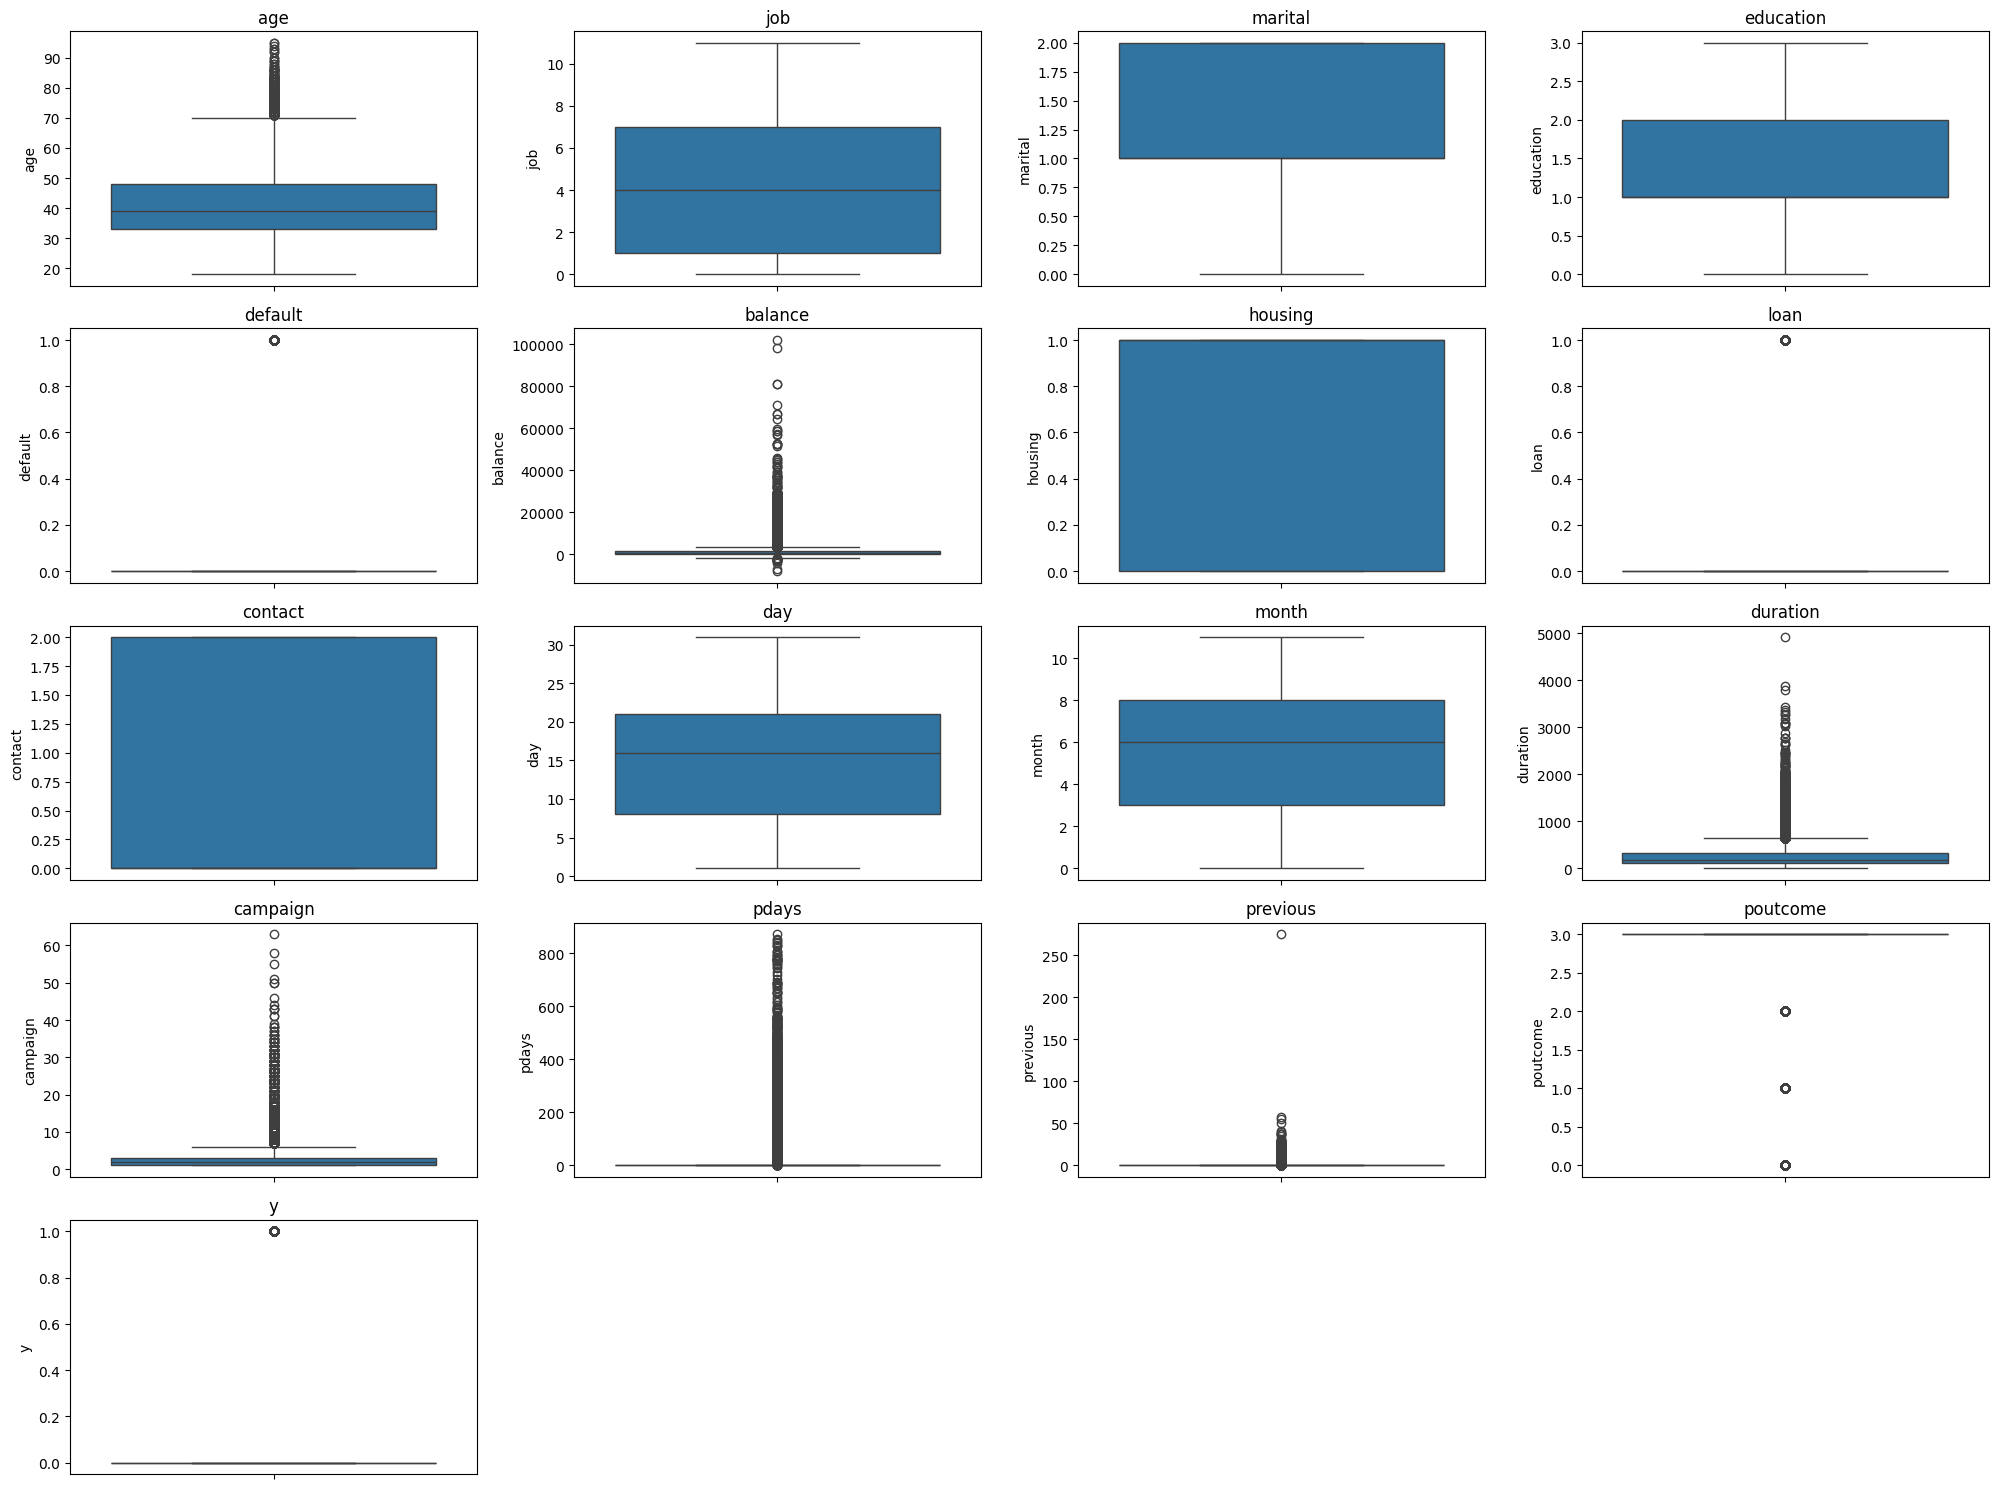

In [ ]:
# prompt: check for outliers in the data using box plot

import matplotlib.pyplot as plt
# Create box plots for each column
plt.figure(figsize=(20, 15))
for i, col in enumerate(data.columns):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(data[col])
    plt.title(col)
plt.tight_layout()
plt.show()


In [ ]:
# prompt: Treat the outliers in the column balance, duration and campaign

import numpy as np
# Calculate the IQR for 'balance', 'duration', and 'campaign'
Q1_balance = data['balance'].quantile(0.25)
Q3_balance = data['balance'].quantile(0.75)
IQR_balance = Q3_balance - Q1_balance

Q1_duration = data['duration'].quantile(0.25)
Q3_duration = data['duration'].quantile(0.75)
IQR_duration = Q3_duration - Q1_duration

Q1_campaign = data['campaign'].quantile(0.25)
Q3_campaign = data['campaign'].quantile(0.75)
IQR_campaign = Q3_campaign - Q1_campaign

# Define bounds for outliers
lower_bound_balance = Q1_balance - 1.5 * IQR_balance
upper_bound_balance = Q3_balance + 1.5 * IQR_balance

lower_bound_duration = Q1_duration - 1.5 * IQR_duration
upper_bound_duration = Q3_duration + 1.5 * IQR_duration

lower_bound_campaign = Q1_campaign - 1.5 * IQR_campaign
upper_bound_campaign = Q3_campaign + 1.5 * IQR_campaign

# Replace outliers with the bounds
data['balance'] = np.where(data['balance'] < lower_bound_balance, lower_bound_balance, data['balance'])
data['balance'] = np.where(data['balance'] > upper_bound_balance, upper_bound_balance, data['balance'])

data['duration'] = np.where(data['duration'] < lower_bound_duration, lower_bound_duration, data['duration'])
data['duration'] = np.where(data['duration'] > upper_bound_duration, upper_bound_duration, data['duration'])

data['campaign'] = np.where(data['campaign'] < lower_bound_campaign, lower_bound_campaign, data['campaign'])
data['campaign'] = np.where(data['campaign'] > upper_bound_campaign, upper_bound_campaign, data['campaign'])

# Display the updated DataFrame (optional)
data


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143.0,1,0,2,5,8,261.0,1.0,-1,0,3,0
1,44,9,2,1,0,29.0,1,0,2,5,8,151.0,1.0,-1,0,3,0
2,33,2,1,1,0,2.0,1,1,2,5,8,76.0,1.0,-1,0,3,0
3,47,1,1,3,0,1506.0,1,0,2,5,8,92.0,1.0,-1,0,3,0
4,33,11,2,3,0,1.0,0,0,2,5,8,198.0,1.0,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825.0,0,0,0,17,9,643.0,3.0,-1,0,3,1
45207,71,5,0,0,0,1729.0,0,0,0,17,9,456.0,2.0,-1,0,3,1
45208,72,5,1,1,0,3462.0,0,0,0,17,9,643.0,5.0,184,3,2,1
45209,57,1,1,1,0,668.0,0,0,1,17,9,508.0,4.0,-1,0,3,0


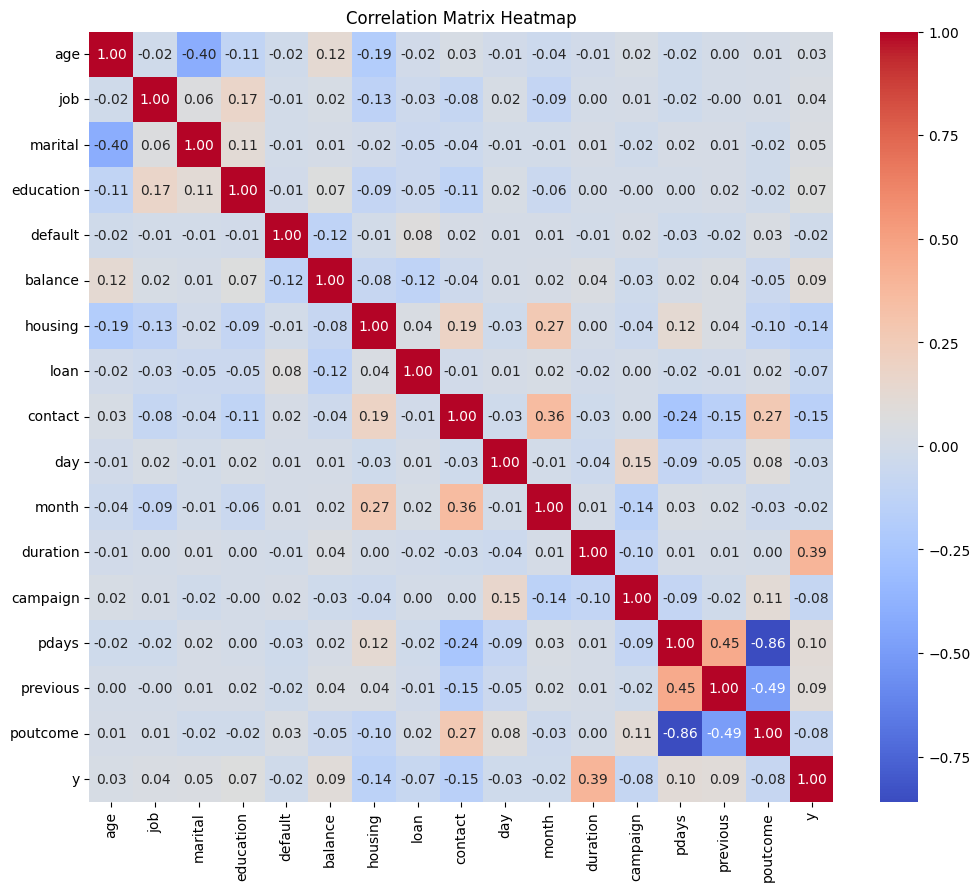

In [ ]:
# prompt: genreate correlation matrix using heatmap on numerical columns

import matplotlib.pyplot as plt
# Assuming 'data' DataFrame is already processed as in the provided code.

plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


In [ ]:
# prompt: define dependent variable as column "y" and rest all as independent variable

# Define dependent and independent variables
y = data['y']
X = data.drop('y', axis=1)


In [ ]:
y

,y
0,0
1,0
2,0
3,0
4,0
...,...
45206,1
45207,1
45208,1
45209,0


In [ ]:
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143.0,1,0,2,5,8,261.0,1.0,-1,0,3
1,44,9,2,1,0,29.0,1,0,2,5,8,151.0,1.0,-1,0,3
2,33,2,1,1,0,2.0,1,1,2,5,8,76.0,1.0,-1,0,3
3,47,1,1,3,0,1506.0,1,0,2,5,8,92.0,1.0,-1,0,3
4,33,11,2,3,0,1.0,0,0,2,5,8,198.0,1.0,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825.0,0,0,0,17,9,643.0,3.0,-1,0,3
45207,71,5,0,0,0,1729.0,0,0,0,17,9,456.0,2.0,-1,0,3
45208,72,5,1,1,0,3462.0,0,0,0,17,9,643.0,5.0,184,3,2
45209,57,1,1,1,0,668.0,0,0,1,17,9,508.0,4.0,-1,0,3


In [ ]:
# prompt: extract logistic regreession equation using stats model

import statsmodels.api as sm

# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit the logistic regression model
model = sm.Logit(y, X).fit()

# Print the model summary
print(model.summary())

# Extract the coefficients
coefficients = model.params

# Extract the intercept
intercept = coefficients['const']

# Create the logistic regression equation string
equation = f"Logit(y) = {intercept:.4f}"
for i, col in enumerate(X.columns[1:]):  # Exclude 'const'
    equation += f" + {coefficients[col]:.4f} * {col}"

print("\nLogistic Regression Equation:")
equation



Optimization terminated successfully.
         Current function value: 0.259083
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45194
Method:                           MLE   Df Model:                           16
Date:                Thu, 03 Apr 2025   Pseudo R-squ.:                  0.2821
Time:                        18:16:25   Log-Likelihood:                -11713.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.7378      0.152    -31.193      0.000      -5.036      -4.440
age            0.0067      0.

'Logit(y) = -4.7378 + 0.0067 * age + 0.0097 * job + 0.2041 * marital + 0.1986 * education + -0.3287 * default + 0.0001 * balance + -1.0122 * housing + -0.6307 * loan + -0.5939 * contact + -0.0056 * day + 0.0349 * month + 0.0064 * duration + -0.1721 * campaign + 0.0037 * pdays + 0.0920 * previous + 0.2382 * poutcome'

In [ ]:
# prompt: drop insignificant independent variable   based on the highest p-value until all variables are significant

import pandas as pd
import numpy as np
import statsmodels.api as sm

# ... (Your existing code for data loading, preprocessing, etc.)

# Define dependent and independent variables
y = data['y']
X = data.drop('y', axis=1)

# Add a constant to the independent variables
X = sm.add_constant(X)

def stepwise_selection(X, y, initial_list=[], threshold_in=0.05, threshold_out=0.10, verbose=True):
    included = list(initial_list)
    while True:
        changed = False
        # forward step
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.Logit(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit(disp=0)
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.Logit(y, sm.add_constant(pd.DataFrame(X[included]))).fit(disp=0)
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()  # null if pvalues is empty
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X, y)

print('resulting features:')
print(result)

#Refit model with selected features
X_new = X[result]
X_new = sm.add_constant(X_new)
model_final = sm.Logit(y, X_new).fit()

print(model_final.summary())


Add  duration                       with p-value 0.0
Add  const                          with p-value 0.0
Add  housing                        with p-value 1.437e-226
Add  pdays                          with p-value 2.27137e-175
Add  contact                        with p-value 1.03526e-107
Add  campaign                       with p-value 3.56787e-48
Add  loan                           with p-value 1.39761e-40
Add  balance                        with p-value 7.53806e-31
Add  previous                       with p-value 1.08419e-21
Add  education                      with p-value 3.60013e-19
Add  poutcome                       with p-value 2.31008e-14
Add  month                          with p-value 2.00813e-09
Add  marital                        with p-value 3.32472e-08
Add  age                            with p-value 6.72699e-05
Add  day                            with p-value 0.00677633
Add  default                        with p-value 0.0407983
resulting features:
['duration', 'const', 

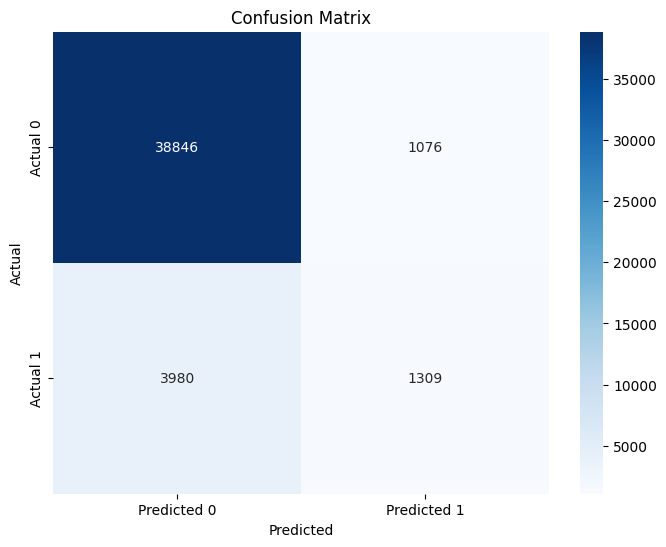

In [ ]:
# prompt: Generate confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'model_final' and 'X_new' are defined as in your previous code.

# Get predictions from the final model
y_pred = model_final.predict(X_new)

# Convert probabilities to class labels (0 or 1) using a threshold of 0.5
y_pred_class = (y_pred > 0.5).astype(int)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y, y_pred_class)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# prompt: Extract AUC

from sklearn.metrics import roc_auc_score

# Calculate AUC
auc = roc_auc_score(y, y_pred)
print(f"AUC: {auc}")


AUC: 0.8743858095606342


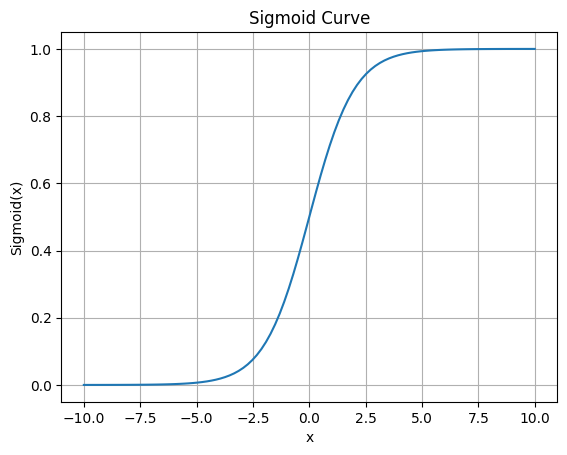

In [ ]:
# prompt: generate sigmoid curve

import matplotlib.pyplot as plt
import numpy as np

# Generate sigmoid curve data
x = np.linspace(-10, 10, 100)
y = 1 / (1 + np.exp(-x))

# Plot the sigmoid curve
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("Sigmoid(x)")
plt.title("Sigmoid Curve")
plt.grid(True)
plt.show()
